# Simulation 1: Interpreting the Error Bar

There exists an underlying true value of y, we call it $y_{true}$.

What we measure: $ y = y_{true} + n$, where $n$ is the noise (we assume it obeys a Gaussian distribution).

__ We do not know $y_{true}$. __, we only have $y$ and $\sigma$. The below simulation demonstrates that $y_{true}$ is contained inside ($y - \sigma$, $y + \sigma$), ~ 68% of the times.

In [1]:
import numpy.random as nr

Y_TRUE = 5
SIGMA = 1

# Measurements
noise = nr.normal(0, SIGMA, 1000)
y = Y_TRUE + noise

# Counting
found = 0
for i in y:
    if Y_TRUE >= i-SIGMA and Y_TRUE <= i + SIGMA:
        found += 1

print(found)

686


# Simulation 2: Sum of Square of K Random Gaussian Variables is a $\chi^2$ distribution.

(array([ 20.,  60., 124., 158., 166., 148., 105.,  83.,  56.,  26.,  22.,
         18.,  11.,   1.,   2.]),
 array([ 3.16450537,  5.31341043,  7.46231548,  9.61122053, 11.76012558,
        13.90903063, 16.05793569, 18.20684074, 20.35574579, 22.50465084,
        24.65355589, 26.80246095, 28.951366  , 31.10027105, 33.2491761 ,
        35.39808115]),
 <a list of 15 Patch objects>)

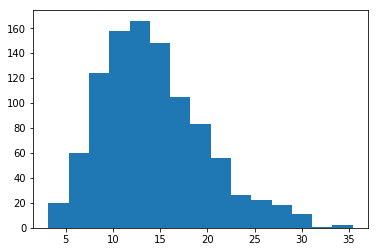

In [15]:
import random
import numpy as np
from scipy.stats import chi2

def gaussian_rvs_squared(num=5):
    return [random.gauss(0,1)**2 for i in range(num)]

N_SIMS = 1000
chi2_measurements = []

for i in range(N_SIMS):
    chi2_measurements.append(np.sum(gaussian_rvs_squared(14)))

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

plt.hist(chi2_measurements, bins=15)

# Simulation 3: $\chi^2_{min}$ obeys a $\chi^2$ distribution with N-m degrees of freedom

In [21]:
import numpy as np
import numpy.random as nr
from scipy.interpolate import interp1d
from fitting import linear_fit # Custom module

# Setup various aspects of the simulation.
# If straight is defined as y = a + bx
a = 2
b = 3

# Number of simulations that need to be performed
nsims = 5000

# Lower and upper limit on X range over which
# synthetic points will be generated.
xlow = 0
xhigh = 10
npoints = 100

# The nature of error on y.
# It can be isoskedastic, then set as that constant.
# It can be heteroskedastic, then set as 'poisson'.
# Gaussian deviates assuming Poisson behavior will be
# used for generating the error bars.
yerr = 'poisson'

In [22]:
a_sim = np.zeros(nsims)
b_sim = np.zeros(nsims)
Sa_sim = np.zeros(nsims)
Sb_sim = np.zeros(nsims)
chi2_sim = np.zeros(nsims)
truechi2_sim = np.zeros(nsims)

# Generate true values of x and y.
xtrue = np.linspace(xlow, xhigh, npoints)
ytrue = a + b*xtrue

# Begin the simulations.
for i in range(nsims):
    
    if yerr == 'poisson':
        yerr_r = np.sqrt(ytrue)
        yr = ytrue + nr.normal(0, 1, npoints) * yerr_r
    else:
        yerr_r = np.ones(npoints)*yerr
        yr = ytrue + nr.normal(0, yerr, npoints)

    bf, af, Sbf, Saf, rchi2f, dof = linear_fit(xtrue, yr, yerr_r)

    a_sim[i] = af
    b_sim[i] = bf
    Sa_sim[i] = Saf
    Sb_sim[i] = Sbf
    chi2_sim[i] = rchi2f*dof
    true_chi2 = ((yr - a - b*xtrue)**2 / yerr_r**2).sum()
    truechi2_sim[i] = true_chi2

results of linear_fit:
   reduced chi squared =  0.8763849917398935
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9266927551083608
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.989849093220354
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9451385587519642
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.6834637617475761
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.113167546123817
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.885796660193379
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.050436007604375
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9968577533684234
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.229976546762666
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared

results of linear_fit:
   reduced chi squared =  0.9891680480759533
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8788495380883834
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8616956389826734
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0031219396209756
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.145434175714231
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0241817311613326
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0479174805407385
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8838517196137289
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9792497699135511
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8440860355219987
   degrees of freedom =  98
results of linear_fit:
   reduced chi squ

results of linear_fit:
   reduced chi squared =  0.8586432131600634
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0258944404341048
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8352887524540115
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8940114436079287
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0096443893553795
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9140464083672405
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9104732757358651
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9285989588399403
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.912998116823107
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.7898821668989021
   degrees of freedom =  98
results of linear_fit:
   reduced chi squ

   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0013581340887077
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9690455738951342
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9215183933031772
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0801938097050943
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9736847305972148
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.1401389912980802
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9537864974747464
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9726015305002111
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0287771973067152
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.1812439778162322
   degrees of freedom =  98
results of l

results of linear_fit:
   reduced chi squared =  1.144049015864289
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8757750757405737
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0432646177141398
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.7563094468791487
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9302593670998205
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9145953011276694
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0792062836890903
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.2003838399222584
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8897952981678576
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8307171277908825
   degrees of freedom =  98
results of linear_fit:
   reduced chi squ

results of linear_fit:
   reduced chi squared =  1.0477981569492893
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.1439462986654485
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8771459418795976
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.893986369860173
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9734131461278205
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8420261035357244
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0363702182479406
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.7440697396912762
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9677968032234432
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8538752087596749
   degrees of freedom =  98
results of linear_fit:
   reduced chi squ

results of linear_fit:
   reduced chi squared =  0.9771546366069235
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.38884510979788
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9783967770726795
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9494207150017053
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.2630419174109573
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.2996659781593258
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9925196781320538
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9098785148572229
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9686280175212821
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0248504425002165
   degrees of freedom =  98
results of linear_fit:
   reduced chi squa

   reduced chi squared =  1.2024196717726452
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9154372968051306
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.7505033975408149
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.2517402979424979
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9222985873180728
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8322251092421483
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.138390769648245
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.1507377264914607
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0422882134120564
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.101994455786932
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.82139372586608

results of linear_fit:
   reduced chi squared =  1.226472038765786
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.1049346663562105
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8494196944378998
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0018774794421856
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.070597641858519
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8289565558259833
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.054476795902991
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.1122105128871906
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.838366466199292
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.1321554020814963
   degrees of freedom =  98
results of linear_fit:
   reduced chi square

results of linear_fit:
   reduced chi squared =  1.0381789298529385
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.035162120483464
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8629271344730745
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.7203671839428308
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0115145605848854
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.3884554327481677
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0411410316548908
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0950978124919462
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9530444747225014
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.1995115143041324
   degrees of freedom =  98
results of linear_fit:
   reduced chi squ

results of linear_fit:
   reduced chi squared =  1.0132113140226349
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8139968871793757
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.9507622573530093
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0515517653952122
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.178483146439696
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.7828634740714209
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8295196612949657
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0469909844722567
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.1652819387154858
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.7844729626518028
   degrees of freedom =  98
results of linear_fit:
   reduced chi squ

results of linear_fit:
   reduced chi squared =  1.06730796529981
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.937787166112293
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0407709579097515
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8452210128016883
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.911697836531881
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.8651462676364873
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.0465476171268366
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  1.2457386263643455
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.7473500485433491
   degrees of freedom =  98
results of linear_fit:
   reduced chi squared =  0.7849874129599312
   degrees of freedom =  98
results of linear_fit:
   reduced chi square

Text(0.5,1,'Distribution of $\\chi^2$. Model: $y = a+bx$ (a=2, b=3)\n        Simulation: $\\mu = 98.064, \\sigma = 13.906$        ')

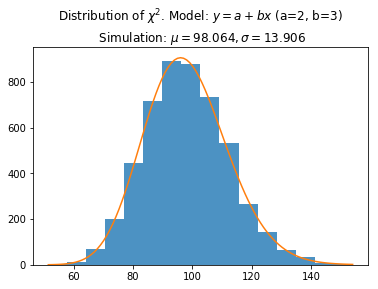

In [23]:
n, thebins, _ = plt.hist(chi2_sim, bins=16, alpha=0.8)

chi2_mean = np.mean(chi2_sim)
chi2_std = np.std(chi2_sim)

xc = (thebins[:-1] + thebins[1:]) / 2.0
yc = n
n_func = interp1d(xc, yc, kind='cubic')
y_at_df = n_func(npoints-2)
factor = y_at_df / chi2.pdf(npoints-2, df=npoints-2)

xchi = np.linspace(thebins.min(), thebins.max(), 100)
ychi = factor*chi2.pdf(xchi, df=npoints-2)
plt.plot(xchi, ychi)

plt.title("Distribution of $\chi^2$. Model: $y = a+bx$ (a=%d, b=%d)\n\
        Simulation: $\mu = %.3f, \sigma = %.3f$\
        "% (a, b, chi2_mean, chi2_std))

# Simulation 4: Joint Confidence Intervals

In [24]:
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.path import Path

x = nr.normal(0, 1, 1000)
y = nr.normal(0, 1, 1000)

fig1 = plt.figure(1, figsize=(6,6))
plt.scatter(x, y, alpha=0.1)


onesigma_vertices = [
        (-1,-1),
        (-1, 1),
        (1, 1),
        (1, -1),
        (-1, -1)
    ]

onep38_sigma_vertices = [
        (-1.38,-1.38),
        (-1.38, 1.38),
        (1.38, 1.38),
        (1.38, -1.38),
        (-1.38, -1.38)
    ]


codes = [Path.MOVETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.CLOSEPOLY]

path = Path(onesigma_vertices, codes)
polygon = Polygon(path.vertices)
num_inside_onesigma = 0
for point in zip(x,y):
    if polygon.contains_point(point):
        num_inside_onesigma += 1

patch = patches.PathPatch(path, facecolor='none', edgecolor="black", lw=2,
        label="#Points = %d" % (num_inside_onesigma))
ax = plt.gca()
ax.add_patch(patch)

path2 = Path(onep38_sigma_vertices, codes)
polygon2 = Polygon(path2.vertices)
num_inside_onep38_sigma = 0
for point in zip(x,y):
    if polygon2.contains_point(point):
        num_inside_onep38_sigma += 1

patch = patches.PathPatch(path2, facecolor='none', edgecolor="green", lw=2,
        label="#Points = %d" % (num_inside_onep38_sigma))
ax = plt.gca()
ax.add_patch(patch)


plt.legend()
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Black Box $-1 \sigma$ to $ +1 \sigma $\n\
        Green Box $-1.38 \sigma$ to $ +1.38 \sigma $")
fig1.savefig("plot1.png")


# Simulation 5: Best Fit Parameters are Gaussian Random Variables

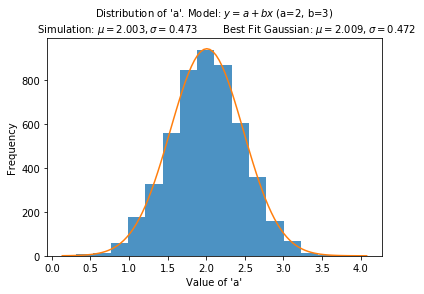

In [26]:
from astropy.modeling import models, fitting

fig1 = plt.figure(1)
n, thebins, _ = plt.hist(a_sim, bins=16, alpha=0.8)

a_mean = np.mean(a_sim)
a_std = np.std(a_sim)

xg = (thebins[:-1] + thebins[1:]) / 2.0
yg = n
gauss_init = models.Gaussian1D(amplitude = nsims, mean = a_mean, stddev=a_std)
fitter = fitting.LevMarLSQFitter()
gauss = fitter(gauss_init, xg, yg)

x_gauss = np.linspace(plt.xlim()[0], plt.xlim()[1], 100)
y_gauss = gauss(x_gauss)

plt.plot(x_gauss, y_gauss)
plt.xlabel("Value of 'a'")
plt.ylabel("Frequency")
plt.title("Distribution of 'a'. Model: $y = a+bx$ (a=%d, b=%d)\n\
        Simulation: $\mu = %.3f, \sigma = %.3f$\
        Best Fit Gaussian: $\mu = %.3f, \sigma = %.3f$ " % (a, b, a_mean, a_std,
            gauss.mean.value, gauss.stddev.value), fontsize=10)
fig1.savefig('a_distribution.png', dpi=300)


# Simulation 6: The distributions of the quantities $\chi^2_{true}$ and $\Delta \chi^2$.

Text(0.5,1,'Distribution of $\\chi^2_{true}$. Model: $y = a+bx$ (a=2, b=3)\n        Simulation: $\\mu = 100.078, \\sigma = 14.073$        ')

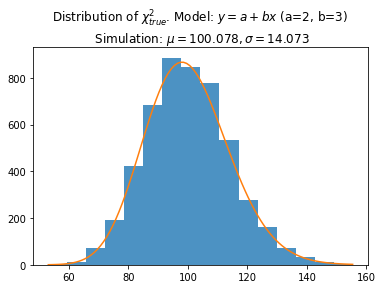

In [27]:
fig4 = plt.figure(4)
n, thebins, _ = plt.hist(truechi2_sim, bins=16, alpha=0.8)

truechi2_mean = np.mean(truechi2_sim)
truechi2_std = np.std(truechi2_sim)

xc = (thebins[:-1] + thebins[1:]) / 2.0
yc = n
n_func = interp1d(xc, yc, kind='cubic')
y_at_df = n_func(npoints)
factor = y_at_df / chi2.pdf(npoints, df=npoints)

xchi = np.linspace(thebins.min(), thebins.max(), 100)
ychi = factor*chi2.pdf(xchi, df=npoints)
plt.plot(xchi, ychi)

plt.title("Distribution of $\chi^2_{true}$. Model: $y = a+bx$ (a=%d, b=%d)\n\
        Simulation: $\mu = %.3f, \sigma = %.3f$\
        "% (a, b, truechi2_mean, truechi2_std))



Text(0.5,1,'Distribution of $\\Delta \\chi^2}$. Model: $y = a+bx$ (a=2, b=3)\n        Simulation: $\\mu = 2.014, \\sigma = 2.025$        ')

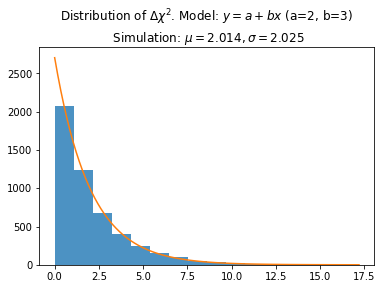

In [28]:
fig5 = plt.figure(5)
delta_chi2 = truechi2_sim - chi2_sim
n, thebins, _ = plt.hist(delta_chi2, bins=16, alpha=0.8)

deltachi2_mean = np.mean(delta_chi2)
deltachi2_std = np.std(delta_chi2)

xc = (thebins[:-1] + thebins[1:]) / 2.0
yc = n
n_func = interp1d(xc, yc, kind='cubic')
y_at_df = n_func(2)
factor = y_at_df / chi2.pdf(2, df=2)

xchi = np.linspace(thebins.min(), thebins.max(), 100)
ychi = factor*chi2.pdf(xchi, df=2)
plt.plot(xchi, ychi)

plt.title("Distribution of $\Delta \chi^2}$. Model: $y = a+bx$ (a=%d, b=%d)\n\
        Simulation: $\mu = %.3f, \sigma = %.3f$\
        "% (a, b, deltachi2_mean, deltachi2_std))



# Simulation 7: Are contours of constant $\chi^2$ ellipses?

In [33]:
from matplotlib import cm
xtrue = np.linspace(xlow, xhigh, npoints)
ytrue = a + b*xtrue

if yerr == 'poisson':
    yerr_r = np.sqrt(ytrue)
    yr = ytrue + nr.normal(0, 1, npoints) * yerr_r
else:
    yerr_r = np.ones(npoints)*yerr
    yr = ytrue + nr.normal(0, yerr, npoints)

bf, af, Sbf, Saf, rchi2f, dof = linear_fit(xtrue, yr, yerr_r)
chi2 = rchi2f*dof

factor = 6
agrid = np.linspace(af - factor*Saf, af + factor*Saf, 300)
bgrid = np.linspace(bf - factor*Sbf, bf + factor*Sbf, 300)
aa, bb = np.meshgrid(agrid, bgrid)

chi2_onsurface = np.zeros(aa.shape)
for i in range(aa.shape[0]):
    for j in range(aa.shape[1]):
        chi2_onsurface[i][j] = ((yr - aa[i][j] - bb[i][j]*xtrue)**2 / yerr_r**2).sum()


fig3 = plt.figure(3)
levels = np.array([2.30, 6.18, 11.83])
plt.contourf(aa, bb, chi2_onsurface, cmap = cm.PuBu_r, alpha=1.0)
CS = plt.contour(aa, bb, chi2_onsurface, levels = chi2 + levels, cmap=cm.Set3)

fmt = {}
strs = ["$\Delta \chi^2 = 2.30 (1 \sigma)$",
    "$\Delta \chi^2 = 6.18 (2 \sigma)$",
    "$\Delta \chi^2 = 11.83 (3 \sigma)$"]

strs = ["2.30", "6.18", "11.83"]


for l, s in zip(CS.levels, strs):
    print(l,s)
    fmt[l] = s

plt.clabel(CS, CS.levels, inline=1, fmt=fmt)
plt.title("Equal $\chi^2$ Contours. Model: $y = a+bx$\n\
        $1\sigma, 2\sigma, 3\sigma$ contours highlighted.")


results of linear_fit:
   reduced chi squared =  0.964667553168134
   degrees of freedom =  98
96.83742021047713 2.30
100.71742021047714 6.18
106.36742021047714 11.83


Text(0.5,1,'Equal $\\chi^2$ Contours. Model: $y = a+bx$\n        $1\\sigma, 2\\sigma, 3\\sigma$ contours highlighted.')

What I want now is to be able to count the number of points lying inside 68% confidence interval.